# 딥러닝3 : 다중분류


## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv"
data = pd.read_csv(path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.데이터 준비

In [ ]:
# np.argmax()
a = np.array([[1,2,3],[3,1,2]])
a

array([[1, 2, 3],
       [3, 1, 2]])

In [ ]:
np.argmax(a, axis = 0)

array([1, 0, 0])

In [ ]:
np.argmax(a, axis = 1)

array([2, 0])

In [ ]:
np.argmax(a)

np.int64(2)

### (1) y 값을 0,1,2로 변환하기
(sparse_categorical_crossentropy 사용을 위해)

In [ ]:
data['Species'] = data['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### (2) 데이터 준비

In [ ]:
target = 'Species'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) 데이터 분할 : train : val

In [ ]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

### (4) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

### (1) 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [ ]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential( [Input(shape = (nfeatures,)),
                     Dense( 3, activation = 'softmax')] )

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

### (2) compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 551ms/step - loss: 1.1516 - val_loss: 0.9536
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - loss: 0.9384 - val_loss: 0.7877
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - loss: 0.8297 - val_loss: 0.6641
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 0.7167 - val_loss: 0.5846
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.6437 - val_loss: 0.5242
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.5638 - val_loss: 0.4665
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.5265 - val_loss: 0.4263
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.4741 - val_loss: 0.3970
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.4878 - val_loss: 0.3764
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.4277 - val_loss: 0.3571
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.4055 - val_loss: 0.3424
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.3786 - val_loss: 0

* 학습결과 그래프

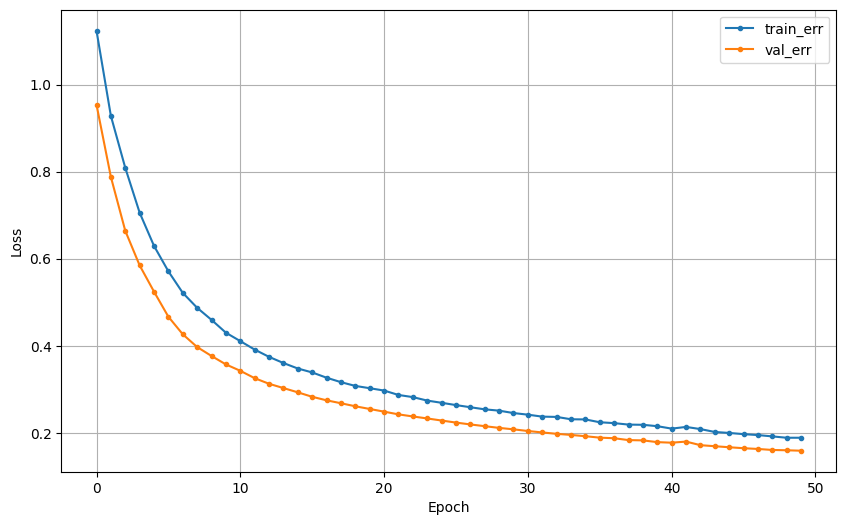

In [ ]:
dl_history_plot(history)

### (3) 예측 및 검증
* 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[9.7960502e-01, 2.0343229e-02, 5.1786639e-05],
       [1.0059368e-02, 8.0510944e-01, 1.8483116e-01],
       [1.2514099e-02, 7.3202258e-01, 2.5546330e-01],
       [3.1127746e-04, 3.3614576e-01, 6.6354299e-01],
       [3.1377111e-02, 8.9199644e-01, 7.6626383e-02]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [ ]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([0, 1, 1, 2, 1])

In [ ]:
pred_1 = pred.argmax(axis=1)
pred_1

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1,
       2])

* 실제값 y_val은 0,1,2 로 된 1차원 값입니다.

In [ ]:
y_val

,Species
47,0
73,1
74,1
129,2
67,1
89,1
143,2
21,0
108,2
12,0


In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 16  2]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      0.89      0.84        18
           2       0.83      0.71      0.77        14

    accuracy                           0.87        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



----

## 4.모델링2 : 은닉층

### (1) 모델

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Input(shape = (nfeatures,)),
                    Dense(8, activation = 'relu'),
                    Dense(3 , activation = 'softmax')
])

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

* compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 1.0537 - val_loss: 1.0625
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.0431 - val_loss: 1.0262
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.0193 - val_loss: 0.9902
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.9905 - val_loss: 0.9513
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.9466 - val_loss: 0.9141
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.9152 - val_loss: 0.8776
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.8811 - val_loss: 0.8429
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.8423 - val_loss: 0.8056
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.8165 - val_loss: 0.7674
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.7784 - val_loss: 0.7306
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.7424 - val_loss: 0.6938
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.7079 - val_loss: 0.6605


* 학습결과 그래프

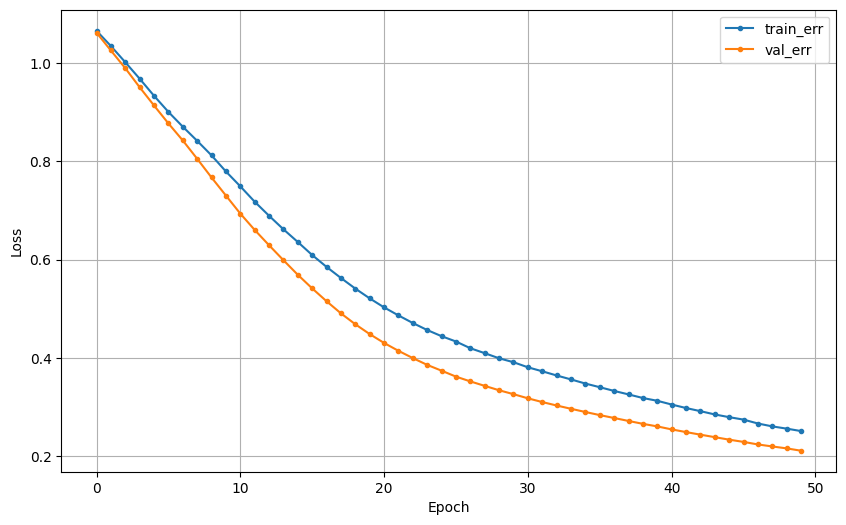

In [ ]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 18  0]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        18
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



### (2) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) | 72 | node, activation = 'relu'  |
| dense_2 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [ ]:
clear_session()

model = Sequential([Input(shape = (nfeatures,)),
                    Dense(8, activation = 'relu'),
                    Dense(3, activation = 'softmax')])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

* compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50, validation_split = 0.2 ).history

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 1.1115 - val_loss: 1.0442
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.0529 - val_loss: 0.9864
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.0041 - val_loss: 0.9269
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.9564 - val_loss: 0.8729
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.9198 - val_loss: 0.8219
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.8968 - val_loss: 0.7747
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.8398 - val_loss: 0.7282
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.7895 - val_loss: 0.6801
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.7543 - val_loss: 0.6335
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6925 - val_loss: 0.5925
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.6748 - val_loss: 0.5574
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.6497 - val_loss: 0.5259


* 학습결과 그래프

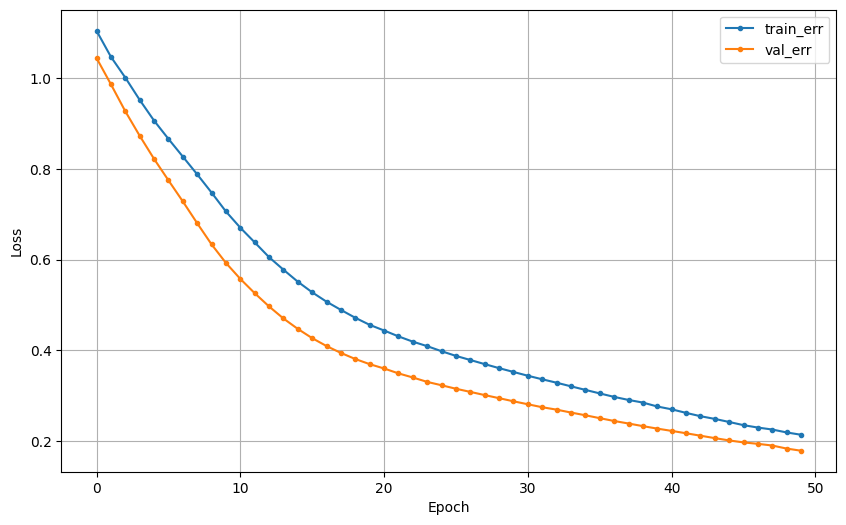

In [ ]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 17  1]
 [ 0  1 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        18
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### (3) 실습2

* 여러분이 원하는 형태로 설계를 해 봅시다.

In [ ]:
clear_session()

model = Sequential([Input(shape = (nfeatures,)),
                    Dense(8, activation = 'relu'),
                    Dense(3, activation = 'relu'),
                    Dense(3, activation = 'softmax')])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79 (316.00 B)

 Trainable params: 79 (316.00 B)

 Non-trainable params: 0 (0.00 B)

* compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs =50, validation_split = 0.2).history

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 1.0793 - val_loss: 1.0721
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.0528 - val_loss: 1.0246
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.0070 - val_loss: 0.9779
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.9689 - val_loss: 0.9308
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.9380 - val_loss: 0.8889
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.8986 - val_loss: 0.8573
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.8675 - val_loss: 0.8236
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.8367 - val_loss: 0.7949
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.8181 - val_loss: 0.7648
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.7654 - val_loss: 0.7382
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7553 - val_loss: 0.7142
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.7247 - val_loss: 0.6937


* 학습결과 그래프

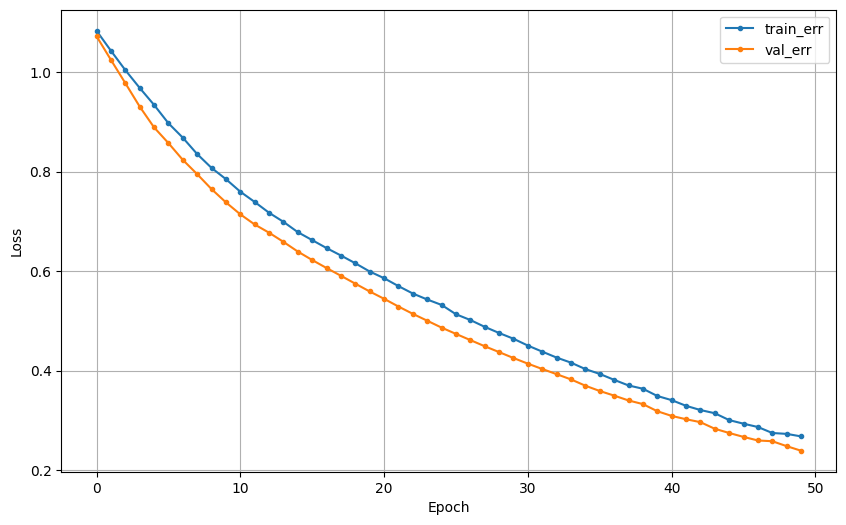

In [ ]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val,pred_1))

[[13  0  0]
 [ 0 18  0]
 [ 0  3 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92        18
           2       1.00      0.79      0.88        14

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



## 5.참조 : y를 one-hot encoding 하여 모델링

* y 가변수화 : to_categorical
* 컴파일에서 loss = 'categorical_crossentropy'

In [ ]:
from keras.utils import to_categorical

### (1) y에 대한 가변수화

In [ ]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y_c = to_categorical(y.values, 3)

In [ ]:
y_c[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

### (2) 데이터 분할2 : train : val

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y_c, test_size = .3, random_state = 2022)

In [ ]:
y_train.shape

(105, 3)

### (3) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (4) 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [ ]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential([Input(shape = (nfeatures,)),
                    Dense(3, activation = 'softmax')])

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

### (5) compile + 학습

* lr과 learning_rate은 같은 의미 입니다. 그러나 향후 버전에서는 lr이 제외될 예정이라고 합니다.
* y를 one-hot encoding 했다면, loss fuction은 **categorical_crossentropy** 입니다.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 100,
                    validation_split=0.2).history

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - loss: 0.9487 - val_loss: 0.8016
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.7915 - val_loss: 0.6845
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.6903 - val_loss: 0.5899
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6101 - val_loss: 0.5281
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.5608 - val_loss: 0.4786
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5074 - val_loss: 0.4433
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4639 - val_loss: 0.4193
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4627 - val_loss: 0.3989
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4385 - val_loss: 0.3832
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4310 - val_loss: 0.3704
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4462 - val_loss: 0.3579
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4034 - val_l

* 학습결과 그래프

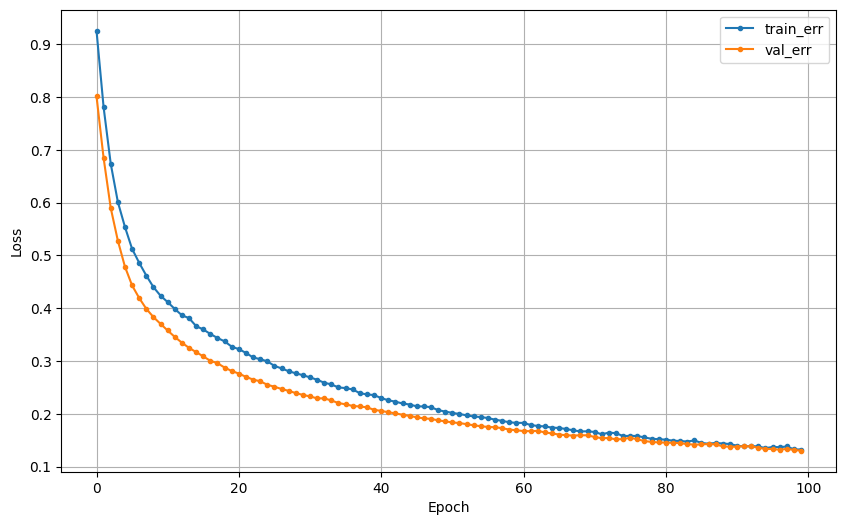

In [ ]:
dl_history_plot(history)

### (6) 예측 및 평가
* 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[8.2197030e-06, 4.0391546e-02, 9.5960021e-01],
       [4.6181381e-07, 4.5727175e-02, 9.5427239e-01],
       [9.7101891e-01, 2.8980568e-02, 4.6787372e-07],
       [3.0865404e-04, 3.1889221e-01, 6.8079913e-01],
       [9.8892218e-01, 1.1077594e-02, 8.0870677e-08]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [ ]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([2, 2, 0, 2, 0])

In [ ]:
y_val

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

* 실제값 y_val도 원래 대로 돌려 놓습니다.

In [ ]:
y_val[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
y_val_1 = y_val.argmax(axis=1)
y_val_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

In [ ]:
print(confusion_matrix(y_val_1, pred_1))
print(classification_report(y_val_1, pred_1))

[[14  0  0]
 [ 0 14  1]
 [ 0  2 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.93      0.90        15
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

